# Advanced regression

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score


# hide warnings
import warnings
warnings.filterwarnings('ignore')

#Setting the columns that can be displayed to max as 200 and rows to 100
pd.set_option('display.max_columns', 200)
pd.options.display.max_rows = 100

In [2]:
#importing data 
df = pd.read_csv("train.csv")

In [3]:
#checking the data shape
df.shape

(1460, 81)

In [4]:
#checking few rows of the dataset
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#checking details of the dataset
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<p style= "background:lightblue"> &#9654; <font color ="darkblue"> <b> NOTE: </b>  We notice there are some columns which have a lot of missing data - we might need to drop these columns. Let's further look into the missing info

In [7]:
#check the missing values
missing_values =round(100*(df.isnull().sum()/len(df)),2).sort_values(ascending=False)
missing_values

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

In [8]:
#Defining a function to visualize the missing data

def misses(x):
    nulls = ((x.isnull().sum()/len(x))*100).sort_values(ascending=False)
    per_miss = nulls.to_frame().reset_index()
    per_miss.rename(columns={'index':'Variables',0:'Missing_Percentage'},inplace=True)
    per_miss.sort_values("Missing_Percentage", ascending=False, inplace=True)
    to_plot = per_miss[per_miss.Missing_Percentage>0]
    plt.figure(figsize=[15,10])
    sns.barplot(data= to_plot, x = to_plot.Variables, y = to_plot.Missing_Percentage )
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

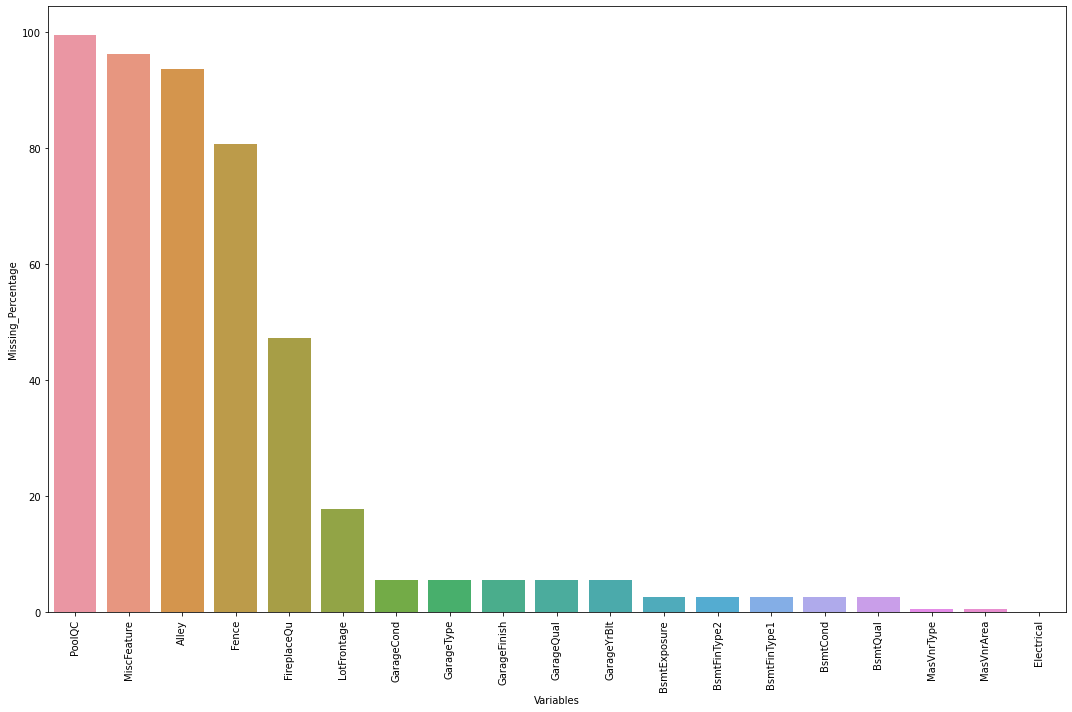

In [9]:
#Checking missing values
misses(df)

### Let us analyze the columns with high missing values


In [10]:
#checking value counts
df.PoolQC.value_counts(dropna = False, normalize = True)

NaN    0.995205
Gd     0.002055
Ex     0.001370
Fa     0.001370
Name: PoolQC, dtype: float64

In [11]:
df.MiscFeature.value_counts(dropna = False, normalize = True)

NaN     0.963014
Shed    0.033562
Gar2    0.001370
Othr    0.001370
TenC    0.000685
Name: MiscFeature, dtype: float64

In [12]:
df.Alley.value_counts(dropna = False, normalize = True)

NaN     0.937671
Grvl    0.034247
Pave    0.028082
Name: Alley, dtype: float64

In [13]:
df.Fence.value_counts(dropna = False, normalize = True)

NaN      0.807534
MnPrv    0.107534
GdPrv    0.040411
GdWo     0.036986
MnWw     0.007534
Name: Fence, dtype: float64

##### We notice that most of the data for the 4 variables above is missing. As such, let's drop these columns.

In [14]:
df.drop(["PoolQC","MiscFeature","Alley","Fence"], axis=1, inplace=True)

In [15]:
df.shape #checking shape after deletion

(1460, 77)

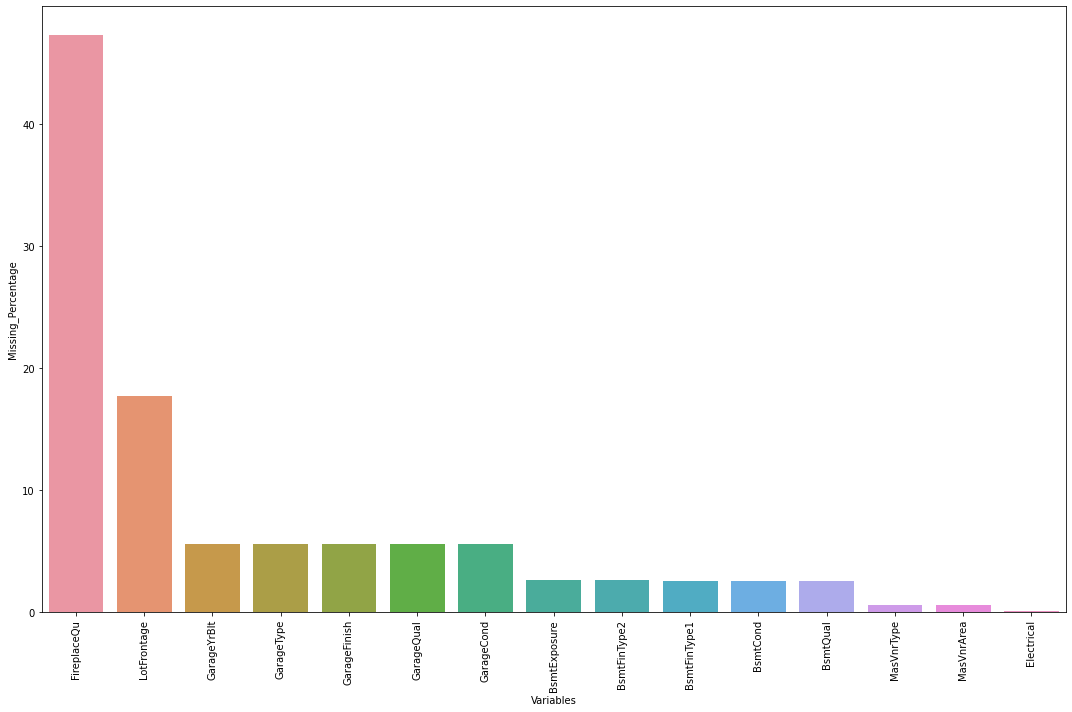

In [16]:
#Lets check the remaining missings
misses(df)

In [17]:
#Lets look at some  f the variables with high missing values and how to handle them
df.FireplaceQu.value_counts(normalize=True, dropna =False)

NaN    0.472603
Gd     0.260274
TA     0.214384
Fa     0.022603
Ex     0.016438
Po     0.013699
Name: FireplaceQu, dtype: float64

In [18]:
#Since we do have a considerable data in non-missing categories, lets impute the NaN with the mode of the column
df.FireplaceQu.fillna(df.FireplaceQu.mode()[0], inplace=True)
df.FireplaceQu.value_counts(normalize=True, dropna =False)

Gd    0.732877
TA    0.214384
Fa    0.022603
Ex    0.016438
Po    0.013699
Name: FireplaceQu, dtype: float64

In [19]:
#Checking values in LotFrontage
df.LotFrontage.value_counts(normalize=True, dropna =False)

NaN      0.177397
60.0     0.097945
70.0     0.047945
80.0     0.047260
50.0     0.039041
           ...   
106.0    0.000685
38.0     0.000685
138.0    0.000685
140.0    0.000685
137.0    0.000685
Name: LotFrontage, Length: 111, dtype: float64

In [20]:
#Since we do have a considerable data in non-missing categories, lets impute the NaN with the median of the numerical column
df.LotFrontage.fillna(df.LotFrontage.median(), inplace=True)
df.LotFrontage.value_counts(normalize=True, dropna =False)

69.0     0.184932
60.0     0.097945
70.0     0.047945
80.0     0.047260
50.0     0.039041
           ...   
33.0     0.000685
38.0     0.000685
138.0    0.000685
140.0    0.000685
137.0    0.000685
Name: LotFrontage, Length: 110, dtype: float64

In [21]:
#From the remaining columns, lets check the columns having more than 5% missing values
df.GarageYrBlt.value_counts(dropna=False, normalize=True)

NaN       0.055479
2005.0    0.044521
2006.0    0.040411
2004.0    0.036301
2003.0    0.034247
2007.0    0.033562
1977.0    0.023973
1998.0    0.021233
1999.0    0.020548
1976.0    0.019863
2008.0    0.019863
2000.0    0.018493
2002.0    0.017808
1968.0    0.017808
1950.0    0.016438
1993.0    0.015068
1962.0    0.014384
2009.0    0.014384
1966.0    0.014384
1965.0    0.014384
1958.0    0.014384
1970.0    0.013699
1996.0    0.013699
1957.0    0.013699
2001.0    0.013699
1997.0    0.013014
1978.0    0.013014
1960.0    0.013014
1954.0    0.013014
1974.0    0.012329
1995.0    0.012329
1994.0    0.012329
1964.0    0.012329
1959.0    0.011644
1956.0    0.010959
1990.0    0.010959
1963.0    0.010959
1979.0    0.010274
1980.0    0.010274
1967.0    0.010274
1969.0    0.010274
1973.0    0.009589
1920.0    0.009589
1988.0    0.009589
1940.0    0.009589
1972.0    0.009589
1961.0    0.008904
1992.0    0.008904
1971.0    0.008904
1955.0    0.008904
1953.0    0.008219
1987.0    0.007534
1948.0    0.

In [22]:
#lets impute the NaN with the median of the numerical column
df.GarageYrBlt.fillna(df.GarageYrBlt.median(), inplace=True)
df.GarageYrBlt.value_counts(normalize=True, dropna =False)

1980.0    0.065753
2005.0    0.044521
2006.0    0.040411
2004.0    0.036301
2003.0    0.034247
2007.0    0.033562
1977.0    0.023973
1998.0    0.021233
1999.0    0.020548
2008.0    0.019863
1976.0    0.019863
2000.0    0.018493
1968.0    0.017808
2002.0    0.017808
1950.0    0.016438
1993.0    0.015068
1965.0    0.014384
1962.0    0.014384
2009.0    0.014384
1966.0    0.014384
1958.0    0.014384
1957.0    0.013699
1996.0    0.013699
1970.0    0.013699
2001.0    0.013699
1960.0    0.013014
1978.0    0.013014
1954.0    0.013014
1997.0    0.013014
1974.0    0.012329
1994.0    0.012329
1995.0    0.012329
1964.0    0.012329
1959.0    0.011644
1990.0    0.010959
1956.0    0.010959
1963.0    0.010959
1979.0    0.010274
1969.0    0.010274
1967.0    0.010274
1940.0    0.009589
1988.0    0.009589
1972.0    0.009589
1973.0    0.009589
1920.0    0.009589
1955.0    0.008904
1971.0    0.008904
1992.0    0.008904
1961.0    0.008904
1953.0    0.008219
1948.0    0.007534
1987.0    0.007534
1925.0    0.

In [23]:
#For the remaining columns, as per the understanding from data dictionary, the NA values represent no Garage, 
#lets replace these meaningful NA with a new category

#Creating a function to replace the values
def rep_with(x):
    #counts of variable before mode imputation
    print("Before imputation: \n")
    print(df[x].value_counts(dropna = False))
    #replacing with the mode value
    df[x]=df[x].replace(np.NaN,"No Garage")
    print("\nNew counts of the variable:")
    print(df[x].value_counts(dropna = False))
    print("\nNulls in {0} post imputation = {1}".format(x ,df[x].isnull().sum()))

In [24]:
rep_with("GarageType")

Before imputation: 

Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

New counts of the variable:
Attchd       870
Detchd       387
BuiltIn       88
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64

Nulls in GarageType post imputation = 0


In [25]:
rep_with("GarageQual")

Before imputation: 

TA     1311
NaN      81
Fa       48
Gd       14
Ex        3
Po        3
Name: GarageQual, dtype: int64

New counts of the variable:
TA           1311
No Garage      81
Fa             48
Gd             14
Ex              3
Po              3
Name: GarageQual, dtype: int64

Nulls in GarageQual post imputation = 0


In [26]:
rep_with("GarageFinish")

Before imputation: 

Unf    605
RFn    422
Fin    352
NaN     81
Name: GarageFinish, dtype: int64

New counts of the variable:
Unf          605
RFn          422
Fin          352
No Garage     81
Name: GarageFinish, dtype: int64

Nulls in GarageFinish post imputation = 0


In [27]:
rep_with("GarageCond")

Before imputation: 

TA     1326
NaN      81
Fa       35
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64

New counts of the variable:
TA           1326
No Garage      81
Fa             35
Gd              9
Po              7
Ex              2
Name: GarageCond, dtype: int64

Nulls in GarageCond post imputation = 0


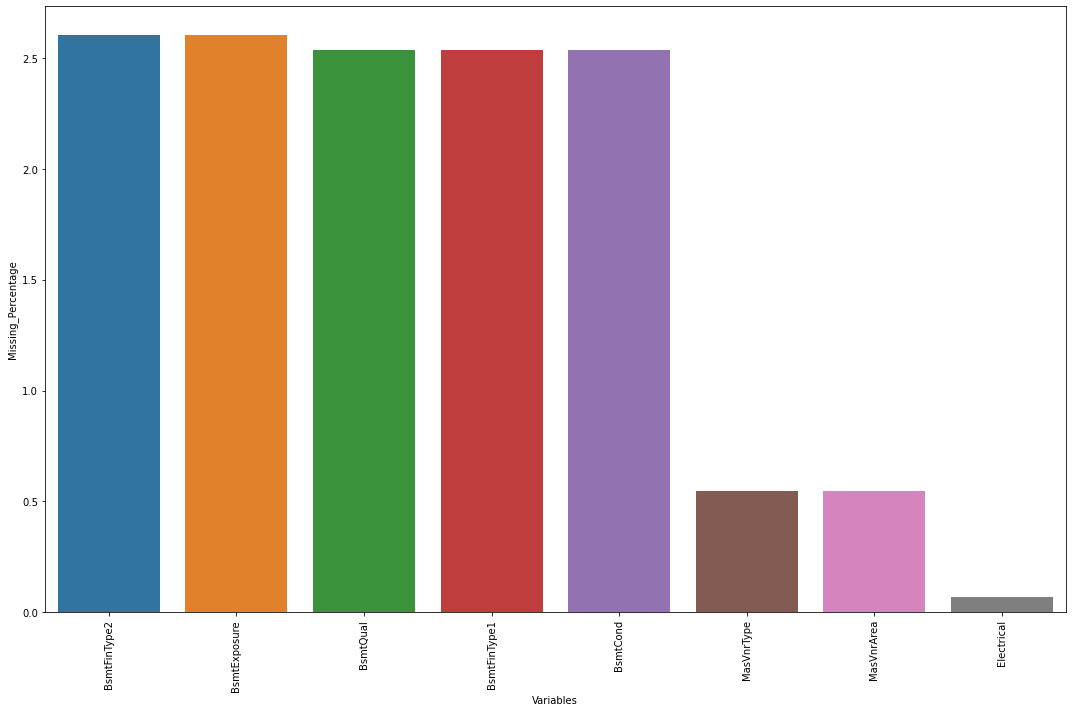

In [28]:
#Lets check the remaining missings
misses(df)

In [29]:
#The missing values in Basement variables signify "No Basement" as per the data dictionary. 
#Lets impute this to the missing value

#Creating a function to replace the values
def rep_with(x):
    #counts of variable before mode imputation
    print("Before imputation: \n")
    print(df[x].value_counts(dropna = False))
    #replacing with the mode value
    df[x]=df[x].replace(np.NaN,"No Basement")
    print("\nNew counts of the variable:")
    print(df[x].value_counts(dropna = False))
    print("\nNulls in {0} post imputation = {1}".format(x ,df[x].isnull().sum()))

In [30]:
rep_with("BsmtFinType2")

Before imputation: 

Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

New counts of the variable:
Unf            1256
Rec              54
LwQ              46
No Basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64

Nulls in BsmtFinType2 post imputation = 0


In [31]:
rep_with("BsmtExposure")

Before imputation: 

No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64

New counts of the variable:
No             953
Av             221
Gd             134
Mn             114
No Basement     38
Name: BsmtExposure, dtype: int64

Nulls in BsmtExposure post imputation = 0


In [32]:
rep_with("BsmtQual")

Before imputation: 

TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

New counts of the variable:
TA             649
Gd             618
Ex             121
No Basement     37
Fa              35
Name: BsmtQual, dtype: int64

Nulls in BsmtQual post imputation = 0


In [33]:
rep_with("BsmtFinType1")

Before imputation: 

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64

New counts of the variable:
Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
No Basement     37
Name: BsmtFinType1, dtype: int64

Nulls in BsmtFinType1 post imputation = 0


In [34]:
rep_with("BsmtCond")

Before imputation: 

TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64

New counts of the variable:
TA             1311
Gd               65
Fa               45
No Basement      37
Po                2
Name: BsmtCond, dtype: int64

Nulls in BsmtCond post imputation = 0


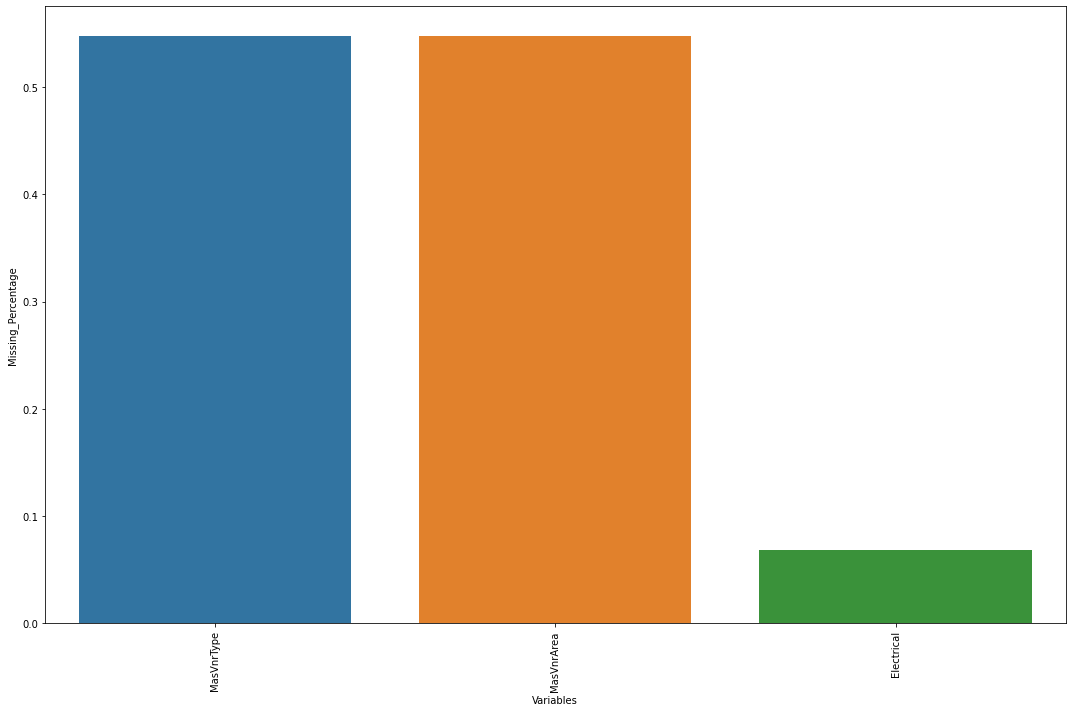

In [35]:
#checkign missing now
misses(df)

In [36]:
#Lets drop these missing rows as these are very small percentage of the total data
df.dropna(inplace = True)

In [37]:
#Checking missing values
df.isnull().sum().sort_values(ascending = False)

SalePrice        0
ExterCond        0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
Foundation       0
TotalBsmtSF      0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
BsmtUnfSF        0
Heating          0
SaleCondition    0
OpenPorchSF      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
EnclosedPorch    0
HeatingQC        0
3SsnPorch        0
ScreenPorch      0
PoolArea    

#### No missing data remain in the dataset

### // Derived variable creation //
##### Few variables like GarageYrBlt, YearBuilt etc. show the year of construction.  A better and more useful representation can be to make new variables which show the age of house, garage etc.


In [38]:
import datetime as dt
thisyear =  dt.datetime.now().year
thisyear

2020

In [39]:
#Finding age of construction. Building a function for it
def find_age(x):
    df[x+"_age"] =  thisyear -  df[x]

In [40]:
find_age("YearBuilt")
find_age("GarageYrBlt")
find_age("YearRemodAdd")

In [41]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YearBuilt_age,GarageYrBlt_age,YearRemodAdd_age
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,17,17.0,17
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,44,44.0,44
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,19,19.0,18
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,105,22.0,50
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,20,20.0,20


In [42]:
df.shape

(1451, 80)

In [43]:
#dropping the old variables
df.drop(columns = ["YearBuilt","GarageYrBlt","YearRemodAdd"], inplace=True)

#Checking shape
df.shape

(1451, 77)

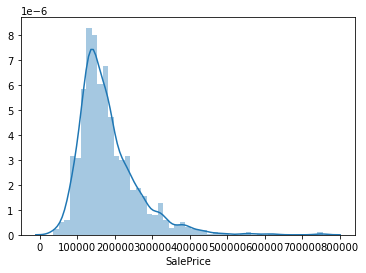

In [44]:
#Checking the distribution of dependent variable
sns.distplot(df["SalePrice"])
plt.show()

##### We notice that the dependent variable is left skewed, as such this might affect the model performance. Let us try to solve this by taking a log transformation of the variable


In [45]:
df["SalePrice_log"] =  np.log(df["SalePrice"])

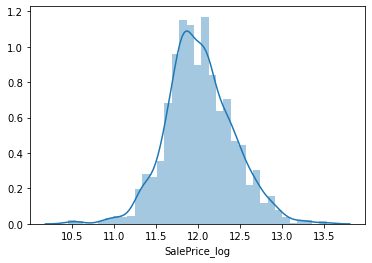

In [46]:
#Checking the distribution of dependent variable now
sns.distplot(df["SalePrice_log"])
plt.show()

##### We notice that the dependent variable now has a close to normal distribution. We can go ahead with further analysis.

In [47]:
#Removing the non-log form of dependent variable
df.drop(columns = ["SalePrice"])

#Removing columns which are post-sales features :   MoSold, YrSold, SaleType, SaleCondition
df.drop(columns = ["MoSold","YrSold","SaleType", "SaleCondition"])
df.shape

(1451, 78)

In [48]:
#Performing dummification of object type variables

#selecting object type variables
list_var = list (df.select_dtypes(include=[np.object]).columns.values)

#dummification
dummy1 = pd.get_dummies(df[list_var])

In [49]:
#merging dummy variables to original dataset
df = pd.concat([df,dummy1], axis=1)
df.shape

(1451, 326)

In [50]:
#dropping original columns
df.drop(columns = list_var, inplace=True)

In [51]:
#checking shape now
df.shape

(1451, 287)

##### Let us look at the correlation between the variables in the dataset.

In [52]:
#Since the number of variables is huge, a heatmap will not be of much help. Lets look at the correlation matrix
c = df.corr().unstack().drop_duplicates().sort_values(ascending=False).apply(lambda x: round(x,2))
c.head(20)

Id                        Id                          1.00
SaleType_New              SaleCondition_Partial       0.99
BsmtQual_No Basement      BsmtExposure_No Basement    0.99
                          BsmtFinType2_No Basement    0.99
Exterior1st_VinylSd       Exterior2nd_VinylSd         0.98
Exterior1st_CemntBd       Exterior2nd_CmentBd         0.97
Exterior1st_MetalSd       Exterior2nd_MetalSd         0.97
BsmtExposure_No Basement  BsmtFinType2_No Basement    0.97
SalePrice                 SalePrice_log               0.95
Exterior1st_HdBoard       Exterior2nd_HdBoard         0.88
GarageCars                GarageArea                  0.88
Exterior1st_Wd Sdng       Exterior2nd_Wd Sdng         0.86
MSZoning_FV               Neighborhood_Somerst        0.86
Exterior1st_AsbShng       Exterior2nd_AsbShng         0.85
RoofStyle_Flat            RoofMatl_Tar&Grv            0.83
GrLivArea                 TotRmsAbvGrd                0.83
TotalBsmtSF               1stFlrSF                    0.

## Data preparation

In [53]:
#Splitting the data into train and test sets
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3,random_state = 42)

y_train = df_train.pop("SalePrice_log")
X_train = df_train

y_test  = df_test.pop("SalePrice_log")
X_test =  df_test

In [54]:
#Scaling the variables 
from sklearn.preprocessing import MinMaxScaler

#Instantiating
scaler = MinMaxScaler()

In [55]:
#fitting the scaler on the train dataset
scaler.fit_transform(X_train)
scaler.fit(X_test)

MinMaxScaler()

###### There are a few highly correlated columns - lets use automated feature selection to first cut down the total number of features (using RFE)

In [56]:
# Feature selection with the RFE

from sklearn.feature_selection import RFE

#instantiating linear regression
lm = LinearRegression()

In [57]:
#using RFE to select 50 most important variables
rfe=RFE(lm,50)
rfe=rfe.fit(X_train,y_train)

In [58]:
#taking final columns selected by RFE
cols = X_train.columns[rfe.support_]

In [59]:
cols

Index(['LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'BldgType_TwnhsE', 'RoofStyle_Flat',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'RoofStyle_Shed', 'ExterQual_Ex', 'ExterQual_Fa',
       'ExterQual_Gd', 'ExterQual_TA', 'Foundation_BrkTil',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'Foundation_Stone', 'Foundation_Wood', 'BsmtCond_Fa', 'BsmtCond_Gd',
       'BsmtCond_Po', 'BsmtCond_TA', 'BsmtFinType1_No Basement',
       'BsmtFinType2_ALQ', 'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ',
       'BsmtFinType2_LwQ', 'BsmtFinType2_Rec', 'BsmtFinType2_Unf',
       'Electrical_Mix', 'FireplaceQu_Ex', 'FireplaceQu_Fa', 'FireplaceQu_Gd',
       'FireplaceQu_Po', 'FireplaceQu_TA', 'GarageCond_Ex', 'GarageCond_Fa',
       'GarageCond_Gd', 'GarageCond_No Garage', 'GarageCond_Po',
       'GarageCond_TA', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'Sa

## Model Selection and Evaluation


#### Linear Model Using columns selected from RFE

In [60]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [61]:
# predict
y_train_pred = lm.predict(X_train)
r2_score(y_train, y_train_pred)


0.9758740120380696

In [62]:
#Checking on the test set
y_test_pred = lm.predict(X_test)
r2_score(y_test, y_test_pred)

0.9411872296752157

<p style= "background:lightblue"> &#9654; <font color ="darkblue"> <b>
r2 score for Train set : 97.58% <br> <br>
r2 score for Test set  : 94.11%

<p style= "background:pink"> &#9654; <font color ="darkblue"> They are pretty close

###### Now lets use Ridge and Lasso Regression to predict the house prices.

## a. RIDGE regression

In [63]:
#Using GridSearchCV - we try to run multiple ridge regression models and look for the best alpha value

#list of alphas
param_grid =  {'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                       9.0, 10.0, 20.0, 50.0, 100.0]}

folds = 5 #Using a 5-fold cross validation

ridge = Ridge() #Instantiating

#GridSearchCV
model_rdg = GridSearchCV(estimator = ridge,
                        cv = folds,
                        param_grid = param_grid,
                        scoring = "r2",
                        return_train_score = True,
                        verbose = 1)

model_rdg.fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    2.1s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20.0, 50.0, 100.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [64]:
cv_out = pd.DataFrame(model_rdg.cv_results_)
cv_out.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011201,0.003919,0.004802,0.003921,0.001,{'alpha': 0.001},0.921977,0.926394,0.943486,0.937015,0.956155,0.937005,0.012224,24,0.978491,0.980226,0.978226,0.978112,0.976267,0.978265,0.001258
1,0.011202,0.003920,0.004801,0.003920,0.01,{'alpha': 0.01},0.922379,0.927121,0.943811,0.937409,0.956130,0.937370,0.012026,23,0.978491,0.980222,0.978223,0.978110,0.976266,0.978262,0.001257
2,0.011200,0.003921,0.004802,0.003920,0.1,{'alpha': 0.1},0.925572,0.931763,0.945732,0.939954,0.956171,0.939838,0.010679,22,0.978441,0.980005,0.978097,0.978010,0.976164,0.978143,0.001224
3,0.009601,0.003200,0.003201,0.003920,0.2,{'alpha': 0.2},0.928007,0.934510,0.946831,0.941375,0.956469,0.941439,0.009833,21,0.978338,0.979695,0.977910,0.977855,0.976006,0.977961,0.001182
4,0.009600,0.003201,0.004802,0.003921,0.3,{'alpha': 0.3},0.929768,0.936321,0.947522,0.942223,0.956811,0.942529,0.009278,20,0.978214,0.979409,0.977725,0.977704,0.975843,0.977779,0.001149


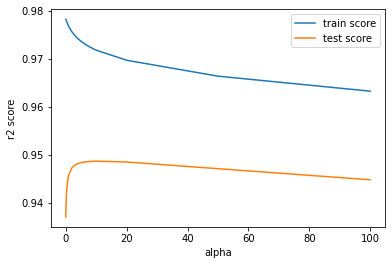

In [65]:
#plot the scores
cv_out['param_alpha'] = cv_out['param_alpha'].astype('float')
plt.plot(cv_out['param_alpha'], cv_out['mean_train_score'])
plt.plot(cv_out['param_alpha'], cv_out['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.legend(['train score', 'test score'], loc='bottom')
plt.show()

In [66]:
print(model_rdg.best_params_)
print(model_rdg.best_score_)

{'alpha': 10.0}
0.9486394213101624


#### Using Ridge Regression, we get the optimal alpha as 10.0

In [67]:
#Using alpha = 10.0
ridge_double = Ridge(alpha = 10.0)

ridge_double.fit(X_train, y_train)

#predict
y_train_pred = ridge_double.predict(X_train)
print("r2 score of train : {0} %".format(r2_score(y_train, y_train_pred)*100))

#on test set
y_test_pred = ridge_double.predict(X_test)
print("r2 score of test : {0} %".format(r2_score(y_test, y_test_pred)*100))

model_params = list(ridge_double.coef_)
model_params.insert(0, ridge_double.intercept_)
model_params = [round(x, 3) for x in model_params]
cols = df_train.columns
cols = cols.insert(0, "constant")
fnl = list(zip(cols, model_params))

r2 score of train : 97.03915603055819 %
r2 score of test : 95.09353530686755 %


In [68]:
fnl

[('constant', 15.888),
 ('Id', -0.0),
 ('MSSubClass', 0.0),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('OverallQual', 0.032),
 ('OverallCond', 0.018),
 ('MasVnrArea', -0.0),
 ('BsmtFinSF1', -0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', -0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 0.022),
 ('BsmtHalfBath', 0.004),
 ('FullBath', 0.001),
 ('HalfBath', 0.006),
 ('BedroomAbvGr', 0.021),
 ('KitchenAbvGr', 0.002),
 ('TotRmsAbvGrd', 0.002),
 ('Fireplaces', 0.015),
 ('GarageCars', 0.022),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', -0.0),
 ('MiscVal', -0.0),
 ('MoSold', 0.001),
 ('YrSold', -0.003),
 ('SalePrice', 0.0),
 ('YearBuilt_age', -0.001),
 ('GarageYrBlt_age', 0.0),
 ('YearRemodAdd_age', -0.001),
 ('MSZoning_C (all)', -0.047),
 ('MSZoning_FV', 0.019),
 ('MSZoning_RH', 0.019),
 ('MSZoning_RL', 0.02

<p style= "background:pink"> &#9654; <font color ="darkblue"> <b>Selecting the top 5 features affecting House prices based on Ridge (alpha = 10.0): <br>

<p style= "background:pink"><font color ="darkblue"><b>1. Neighborhood_Crawfor     (0.042) <br>
2. OverallQual           (0.032)<br>
3. HouseStyle_2.5Unf      (0.031)<br>
4. Neighborhood_ClearCr            (0.03)<br>
5. Functional_Min1     (0.028)

## Lasso Regression

In [69]:
#Using GridSearchCV - we try to run multiple ridge regression models and look for the best alpha value

#list of alphas
param_grid =  {'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                       9.0, 10.0, 20.0, 50.0, 100.0]}

folds = 5 #Using a 5-fold cross validation

lasso = Lasso() #Instantiating

#GridSearchCV
model_rdg = GridSearchCV(estimator = lasso,
                        cv = folds,
                        param_grid = param_grid,
                        scoring = "r2",
                        return_train_score = True,
                        verbose = 1)

model_rdg.fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    1.9s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20.0, 50.0, 100.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [70]:
cv_out = pd.DataFrame(model_rdg.cv_results_)
cv_out.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.017602,0.003200,0.003416,4.197041e-03,0.001,{'alpha': 0.001},0.928922,0.948025,0.943992,0.939358,0.954536,0.942966,0.008611,1,0.965351,0.963317,0.964033,0.963635,0.961408,0.963549,0.001275
1,0.009602,0.003200,0.008001,7.478899e-07,0.01,{'alpha': 0.01},0.904651,0.928880,0.928939,0.914064,0.920413,0.919389,0.009251,2,0.944681,0.939172,0.940716,0.940334,0.940629,0.941106,0.001871
2,0.013501,0.003220,0.001631,3.261852e-03,0.1,{'alpha': 0.1},0.904917,0.906495,0.912538,0.907892,0.911746,0.908718,0.002961,3,0.929268,0.928293,0.927870,0.928344,0.927254,0.928206,0.000659
3,0.011167,0.006334,0.005023,4.121358e-03,0.2,{'alpha': 0.2},0.903590,0.901040,0.907970,0.906206,0.913268,0.906415,0.004154,4,0.926630,0.925076,0.925566,0.924316,0.924947,0.925307,0.000772
4,0.012802,0.003920,0.001600,3.200531e-03,0.3,{'alpha': 0.3},0.904504,0.897455,0.904725,0.908049,0.916864,0.906319,0.006302,5,0.924782,0.923656,0.923561,0.922717,0.923192,0.923582,0.000685


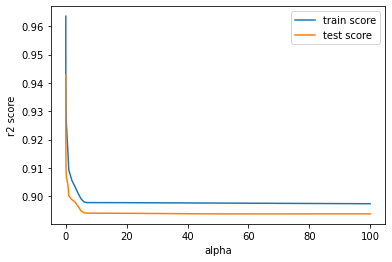

In [71]:
#plot the scores
cv_out['param_alpha'] = cv_out['param_alpha'].astype('float')
plt.plot(cv_out['param_alpha'], cv_out['mean_train_score'])
plt.plot(cv_out['param_alpha'], cv_out['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.legend(['train score', 'test score'], loc='bottom')
plt.show()

In [72]:
print(model_rdg.best_params_)
print(model_rdg.best_score_)

{'alpha': 0.001}
0.9429664408911778


#### Using Lasso and GridSearchCV, we get the optimal alpha as 0.001. Lets build our final model using Lasso with alpha as 0.001

In [73]:
#Lasso
lm_l = Lasso(alpha=0.001)
lm_l.fit(X_train, y_train)

#predict
y_train_pred = lm_l.predict(X_train)
print("r2 score of train : {0} %".format(r2_score(y_train, y_train_pred)*100))

#on test set
y_test_pred = lm_l.predict(X_test)
print("r2 score of test : {0} %".format(r2_score(y_test, y_test_pred)*100))

r2 score of train : 96.19316440601304 %
r2 score of test : 94.44238110038738 %


In [74]:
#Lasso model parameters
model_params = list(lm_l.coef_)
model_params.insert(0, lm_l.intercept_)
model_params = [round(x, 3) for x in model_params]
cols = df_train.columns
cols = cols.insert(0, "constant")
fnl = list(zip(cols, model_params))

In [75]:
fnl

[('constant', 16.548),
 ('Id', -0.0),
 ('MSSubClass', 0.0),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('OverallQual', 0.033),
 ('OverallCond', 0.023),
 ('MasVnrArea', -0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 0.018),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', 0.02),
 ('KitchenAbvGr', 0.0),
 ('TotRmsAbvGrd', 0.004),
 ('Fireplaces', 0.016),
 ('GarageCars', 0.024),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', -0.0),
 ('MiscVal', -0.0),
 ('MoSold', 0.002),
 ('YrSold', -0.003),
 ('SalePrice', 0.0),
 ('YearBuilt_age', -0.001),
 ('GarageYrBlt_age', 0.001),
 ('YearRemodAdd_age', -0.001),
 ('MSZoning_C (all)', -0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.005),
 ('MSZoning_

##### Using Lasso regression, we have found the features that are most relevant.  We select Lasso as our final model because:
1. Lasso does feature selection for us - in the final list, it has implicity made the coefficients of a few features as 0. Hence we get the most important features.

In [76]:
#List of all predictors with non zero co-efficients
for i in range(len(fnl)):
    if(fnl[i][1]!=0):
        print(fnl[i][0])

constant
OverallQual
OverallCond
BsmtFullBath
BedroomAbvGr
TotRmsAbvGrd
Fireplaces
GarageCars
MoSold
YrSold
YearBuilt_age
GarageYrBlt_age
YearRemodAdd_age
MSZoning_RL
MSZoning_RM
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_MeadowV
Neighborhood_NAmes
Neighborhood_NoRidge
BldgType_Twnhs
HouseStyle_1Story
Exterior1st_BrkFace
Exterior1st_HdBoard
Exterior1st_MetalSd
Exterior2nd_Plywood
MasVnrType_BrkFace
MasVnrType_None
ExterQual_Ex
Foundation_PConc
BsmtQual_Ex
BsmtQual_Gd
BsmtQual_TA
BsmtCond_TA
BsmtExposure_No
BsmtExposure_No Basement
BsmtFinType1_ALQ
BsmtFinType1_Unf
BsmtFinType2_Unf
HeatingQC_Ex
CentralAir_N
KitchenQual_Ex
KitchenQual_Gd
Functional_Typ
GarageType_Attchd
GarageType_No Garage
GarageFinish_Fin
GarageFinish_No Garage
GarageFinish_RFn
GarageFinish_Unf
GarageQual_TA
GarageCond_No Garage
PavedDrive_N
PavedDrive_Y
SaleCondition_Abnorml


<p style= "background:pink"> &#9654; <font color ="darkblue"> <b>Selecting the top 5 features affecting House prices based on Lasso (alpha = 0.001): <br>

<p style= "background:pink"><font color ="darkblue"><b>1. Neighborhood_Crawfor      (0.034) <br>
2. OverallQual           (0.033)<br>
3. BsmtFinType2_Unf      (0.026)<br>
4. GarageCars            (0.024)<br>
5. GarageType_Attchd     (0.024)

***

In [77]:
#for question 1


In [78]:
#Doubling the optimnal value of 10.0 to 20.0 for Ridge
ridge_double = Ridge(alpha = 20.0)

ridge_double.fit(X_train, y_train)

Ridge(alpha=20.0)

In [79]:
#predict
y_train_pred = ridge_double.predict(X_train)
print("r2 score of train : {0} %".format(r2_score(y_train, y_train_pred)*100))

#on test set
y_test_pred = ridge_double.predict(X_test)
print("r2 score of test : {0} %".format(r2_score(y_test, y_test_pred)*100))

model_params = list(ridge_double.coef_)
model_params.insert(0, ridge_double.intercept_)
model_params = [round(x, 3) for x in model_params]
cols = df_train.columns
cols = cols.insert(0, "constant")
fnl = list(zip(cols, model_params))

r2 score of train : 96.85014512660098 %
r2 score of test : 95.05710050573052 %


In [80]:
fnl

[('constant', 16.683),
 ('Id', -0.0),
 ('MSSubClass', 0.0),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('OverallQual', 0.032),
 ('OverallCond', 0.019),
 ('MasVnrArea', -0.0),
 ('BsmtFinSF1', -0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', -0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 0.021),
 ('BsmtHalfBath', 0.003),
 ('FullBath', 0.003),
 ('HalfBath', 0.006),
 ('BedroomAbvGr', 0.02),
 ('KitchenAbvGr', 0.003),
 ('TotRmsAbvGrd', 0.003),
 ('Fireplaces', 0.015),
 ('GarageCars', 0.021),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', -0.0),
 ('MiscVal', -0.0),
 ('MoSold', 0.001),
 ('YrSold', -0.003),
 ('SalePrice', 0.0),
 ('YearBuilt_age', -0.001),
 ('GarageYrBlt_age', 0.0),
 ('YearRemodAdd_age', -0.001),
 ('MSZoning_C (all)', -0.028),
 ('MSZoning_FV', 0.015),
 ('MSZoning_RH', 0.011),
 ('MSZoning_RL', 0.02)

<p style= "background:pink"> &#9654; <font color ="darkblue"> <b>Selecting the top 5 features affecting House prices based on Ridge (alpha = 20.0): <br>

<p style= "background:pink"><font color ="darkblue"><b>1. Neighborhood_Crawfor     (0.034) <br>
2. OverallQual           (0.032)<br>
3. CentralAir_Y      (0.024)<br>
4. Neighborhood_ClearCr            (0.022)<br>
5. BsmtFinType2_Unf     (0.022)

In [81]:
#Doubling the optimnal value of 0.001 to 0.002 for lasso
lasso_double = Lasso(alpha = 0.002)

lasso_double.fit(X_train, y_train)

#predict
y_train_pred = lasso_double.predict(X_train)
print("r2 score of train : {0} %".format(r2_score(y_train, y_train_pred)*100))

#on test set
y_test_pred = lasso_double.predict(X_test)
print("r2 score of test : {0} %".format(r2_score(y_test, y_test_pred)*100))

model_params = list(lasso_double.coef_)
model_params.insert(0, lasso_double.intercept_)
model_params = [round(x, 3) for x in model_params]
cols = df_train.columns
cols = cols.insert(0, "constant")
fnl = list(zip(cols, model_params))

r2 score of train : 95.71820416450274 %
r2 score of test : 94.25051322252843 %


In [82]:
fnl

[('constant', 16.054),
 ('Id', -0.0),
 ('MSSubClass', 0.0),
 ('LotFrontage', -0.0),
 ('LotArea', 0.0),
 ('OverallQual', 0.033),
 ('OverallCond', 0.024),
 ('MasVnrArea', -0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 0.011),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', 0.02),
 ('KitchenAbvGr', -0.0),
 ('TotRmsAbvGrd', 0.003),
 ('Fireplaces', 0.016),
 ('GarageCars', 0.019),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', -0.0),
 ('MiscVal', -0.0),
 ('MoSold', 0.002),
 ('YrSold', -0.003),
 ('SalePrice', 0.0),
 ('YearBuilt_age', -0.001),
 ('GarageYrBlt_age', 0.001),
 ('YearRemodAdd_age', -0.001),
 ('MSZoning_C (all)', -0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.003),
 ('MSZonin

<p style= "background:pink"> &#9654; <font color ="darkblue"> <b>Selecting the top 5 features affecting House prices based on Lasso (alpha = 0.002): <br>

<p style= "background:pink"><font color ="darkblue"><b>1. OverallQual      (0.033) <br>
2. GarageType_Attchd           (0.025)<br>
3. OverallCond      (0.024)<br>
4. BedroomAbvGr            (0.02)<br>
5. GarageCars     (0.019)

In [83]:
#For Question 3

In [84]:
X_train_3 = X_train.drop (columns = ["Neighborhood_Crawfor","OverallQual","BsmtFinType2_Unf","GarageCars","GarageType_Attchd"])

In [85]:
X_test_3 = X_test.drop (columns = ["Neighborhood_Crawfor","OverallQual","BsmtFinType2_Unf","GarageCars","GarageType_Attchd"])

In [86]:
#Lets build lasso now
#Using GridSearchCV - we try to run multiple ridge regression models and look for the best alpha value

#list of alphas
param_grid =  {'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                       9.0, 10.0, 20.0, 50.0, 100.0]}

folds = 5 #Using a 5-fold cross validation

lasso = Lasso() #Instantiating

#GridSearchCV
model_rdg = GridSearchCV(estimator = lasso,
                        cv = folds,
                        param_grid = param_grid,
                        scoring = "r2",
                        return_train_score = True,
                        verbose = 1)

model_rdg.fit(X_train_3, y_train)


cv_out = pd.DataFrame(model_rdg.cv_results_)
cv_out.head()

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    1.9s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.016202,0.005077,0.004800,0.003919,0.001,{'alpha': 0.001},0.930506,0.939268,0.937768,0.936455,0.952593,0.939318,0.007273,1,0.961841,0.960363,0.960746,0.960770,0.957203,0.960185,0.001570
1,0.011202,0.003919,0.004799,0.003919,0.01,{'alpha': 0.01},0.907396,0.920992,0.922247,0.909876,0.917484,0.915599,0.005948,2,0.939179,0.935861,0.936128,0.936170,0.935101,0.936488,0.001399
2,0.009595,0.003200,0.006407,0.003204,0.1,{'alpha': 0.1},0.904917,0.906494,0.912539,0.907892,0.911746,0.908718,0.002961,3,0.929268,0.928293,0.927870,0.928344,0.927254,0.928206,0.000659
3,0.012803,0.003917,0.001599,0.003198,0.2,{'alpha': 0.2},0.903590,0.901041,0.907970,0.906206,0.913268,0.906415,0.004154,4,0.926630,0.925075,0.925566,0.924316,0.924947,0.925307,0.000772
4,0.011881,0.004869,0.003200,0.003919,0.3,{'alpha': 0.3},0.904504,0.897455,0.904725,0.908049,0.916864,0.906319,0.006302,5,0.924782,0.923657,0.923561,0.922717,0.923192,0.923582,0.000685


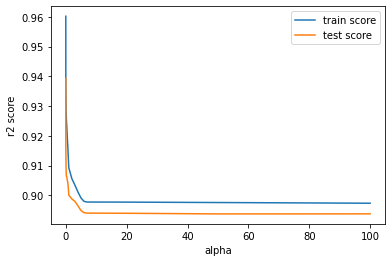

In [87]:
#plot the scores
cv_out['param_alpha'] = cv_out['param_alpha'].astype('float')
plt.plot(cv_out['param_alpha'], cv_out['mean_train_score'])
plt.plot(cv_out['param_alpha'], cv_out['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.legend(['train score', 'test score'], loc='bottom')
plt.show()

In [88]:
print(model_rdg.best_params_)
print(model_rdg.best_score_)

{'alpha': 0.001}
0.9393180737565963


In [89]:
#Lasso
lm_l1 = Lasso(alpha=0.001)
lm_l1.fit(X_train_3, y_train)

#predict
y_train_pred = lm_l1.predict(X_train_3)
print("r2 score of train : {0} %".format(r2_score(y_train, y_train_pred)*100))

#on test set
y_test_pred = lm_l1.predict(X_test_3)
print("r2 score of test : {0} %".format(r2_score(y_test, y_test_pred)*100))


r2 score of train : 95.83862681826265 %
r2 score of test : 94.89139533916092 %


In [90]:
#Lasso model parameters
model_params = list(lm_l1.coef_)
model_params.insert(0, lm_l1.intercept_)
model_params = [round(x, 3) for x in model_params]
cols = X_train_3.columns
cols = cols.insert(0, "constant")
fnl = list(zip(cols, model_params))

In [91]:
fnl

[('constant', 17.336),
 ('Id', -0.0),
 ('MSSubClass', 0.0),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('OverallCond', 0.025),
 ('MasVnrArea', -0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 0.015),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.002),
 ('BedroomAbvGr', 0.019),
 ('KitchenAbvGr', -0.0),
 ('TotRmsAbvGrd', 0.004),
 ('Fireplaces', 0.022),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', -0.0),
 ('MiscVal', -0.0),
 ('MoSold', 0.002),
 ('YrSold', -0.003),
 ('SalePrice', 0.0),
 ('YearBuilt_age', -0.001),
 ('GarageYrBlt_age', 0.001),
 ('YearRemodAdd_age', -0.001),
 ('MSZoning_C (all)', -0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.01),
 ('MSZoning_RM', -0.032),
 ('Street_Grvl', -0.0),
 ('Stree

<p style= "background:pink"> &#9654; <font color ="darkblue"> <b>Selecting the top 5 features affecting House prices after dropping previous best 5: <br>

<p style= "background:pink"><font color ="darkblue"><b>1. BsmtQual_Gd     (0.032) <br>
2. OverallCond           (0.025)<br>
3. Fireplaces      (0.022)<br>
4. BedroomAbvGr            (0.019)<br>
5. KitchenQual_Gd     (0.016)

***